In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Improrting Data

when pandas(pd) reads in data, it returnes the data frame, which lookslike a spread sheet.The data are organized in raws and coloums and each raw can contain a mixture of text and numbers. The standard variable name for a dataframe is the initials df, and that is what we use there:

In [2]:
df = pd.read_csv("Heart_Disease.csv")

In [3]:
df.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Missing Data Part1: Identifying Missing Data

In [4]:
df.dtypes

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [6]:
df['thalach'].unique()

array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
       173, 162, 174, 168, 139, 171, 144, 132, 158, 114, 151, 161, 179,
       120, 112, 137, 157, 169, 165, 123, 128, 152, 140, 188, 109, 125,
       131, 170, 113,  99, 177, 141, 180, 111, 143, 182, 156, 115, 149,
       145, 146, 175, 186, 185, 159, 130, 190, 136,  97, 127, 154, 133,
       126, 202, 103, 166, 164, 184, 124, 122,  96, 138,  88, 105, 194,
       195, 106, 167,  95, 192, 117, 121, 116,  71, 118, 181, 134,  90],
      dtype=int64)

# Missing data Part 2: Dealing with missing data

In [7]:
len(df.loc[(df['ca']  == '?')
          | 
          (df['thal']  == '?')])

6

In [8]:
df.loc[(df['ca']  == '?')
          | 
          (df['thal']  == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [9]:
len(df)

303

In [10]:
df_no_missing = df.loc[(df['ca']  != '?')
          & 
          (df['thal']  != '?')]

In [11]:
len(df_no_missing)

297

In [12]:
 df_no_missing['ca'].unique()

array(['0', '3', '2', '1'], dtype=object)

# Format Data Part 1: Split the data into Dependent and Independent Variables

In [13]:
X = df_no_missing.drop("hd", axis=1).copy() # X= df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [14]:
Y = df_no_missing["hd"].copy()
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

In [15]:
X.dtypes

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca          object
thal        object
dtype: object

# Format the data Part 2: One-Hot Encoding

In [16]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,2,150,0,2.3,3,0,6,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,3,0,0,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2,7,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,3,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,3,0,1,0,0


In [17]:
x_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.5,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2.6,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,0,1,1,0,0,1,0,0


In [18]:
Y.unique()

array([0, 1], dtype=int64)

In [19]:
y_not_zero_index = Y>0
Y[y_not_zero_index]= 1
Y.unique()

array([0, 1], dtype=int64)

# Build a prieliminary Classification

split the data in to training and testing setS and build a tree..We can create a primary Tree and then create a confusion matrix and then optimise

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x_encoded,Y,random_state = 42)
clf_dt = DecisionTreeClassifier(criterion='gini',random_state= 42)
clf_dt = clf_dt.fit(X_train,Y_train)


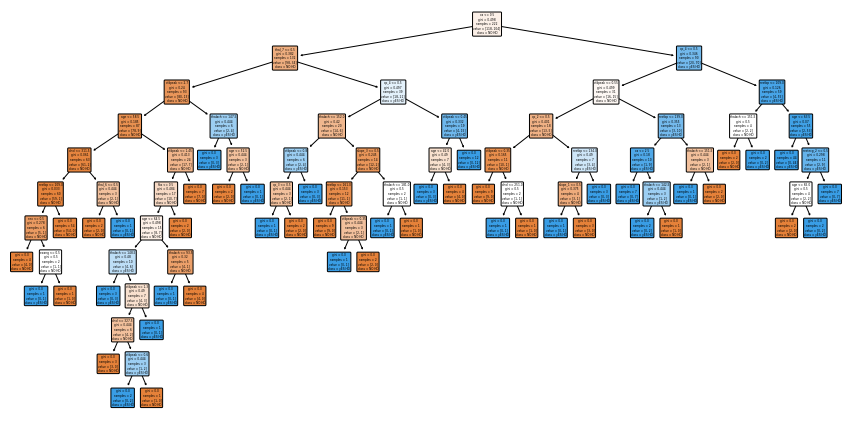

In [21]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,filled= True,rounded=True,class_names=["NO HD", "yES HD"],feature_names= x_encoded.columns);
plt.show()

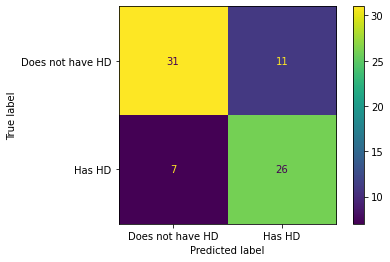

In [22]:
plot_confusion_matrix(clf_dt,X_test, Y_test, display_labels=["Does not have HD", "Has HD"])

# Cost Complexity Pruning Part 1: Visualise alpha


Decission trees are notorious for being overfit to Training Dataset, and there are a lot of parameters like max_depth and min_samples that are designed to reduce the overfitting. But pruning a treee with cost complexity pruning can simplify the whole process of finding a smaller tree that improve the accuracy with the Testing Dataset..
Pruning a kdecission tree is all about finding the right value for pruning parameter ,alpha, which controls how little or how much pruning happens. One way to find out optimal value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both Training Dataset and Testing Dataset.
First lets extract the different values of alpha that are available for this tree and build and a pruned tree for each value for alpha. 
NOTE: We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves ,leaving us with only a root instead of a tree..

In [25]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train)  # determine values for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # exclude maximum value for alpha

clf_dts = []  # create an array that we will put decision trees into

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)


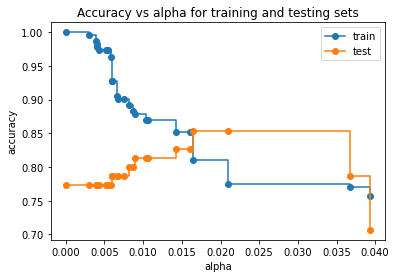

In [26]:
train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]
fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker ='o', label= 'train',drawstyle ="steps-post")
ax.plot(ccp_alphas, test_scores,marker='o', label="test", drawstyle ="steps-post")
ax.legend()
plt.show()

In the abouve graph we can see that the accuracy for the testing dataset hits its maximum value when alpha is about 0.016.After this value for alpha, the accuracy of training dataset dropps off and that suggests we should set ccp_alpha = 0.016

Note: When we apply cost complexity Pruning to a classification Tree, Values for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for regression tree can be much larger since the sum of squared residuals can in theory go from 0 to positive infinity

# Cost Complexity Pruning Part 2: Cross Validation For Finding The Best Alpha

The graph we just drew suggested one value for alpha, 0.016, but another set of data might suggest another optimal value
First lets dddemonstraate that different training and testing datasets result in tree with different accuracies when we set ccp_alpha= 0.016. We will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree  with those datasets 

<AxesSubplot:xlabel='tree'>

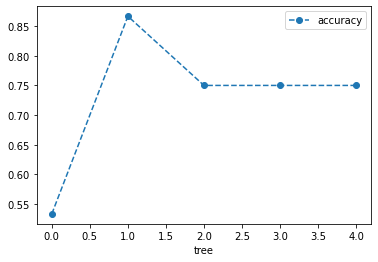

In [27]:
clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016) #create the tree with ccp_alpha= 0.016
## now we can use %-fold cross validation create 5 different training and testing data sets that
## are then used to test and train the tree

scores = cross_val_score(clf_dt,X_train,Y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5),'accuracy': scores})
df.plot(x='tree', y='accuracy', marker ='o',linestyle='--')

The graph shows that using different Training and Testing data with the same alpha resulted in different accuracies suggesting that alpha is sensitive to the datasets.So, instead of picking a single Training datasets and Single Testing Dataset,lets use cross validation to find the optimal value ccp_alpha

<AxesSubplot:xlabel='alpha'>

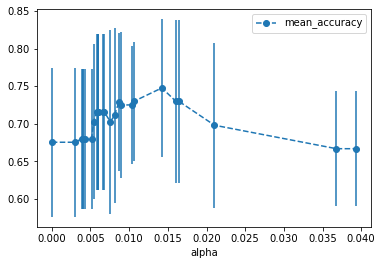

In [28]:
## create an array to store the results of each fold during cross validation
alpha_loop_values =[]
## For each candidate value for alpa we will run 5-fold cross validation 
## Then we will store the mean and standard deviation of scores(accuracy ) for each calls
## to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,Y_train, cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
## Now we can draw the fraph of means and standard deviations of scores for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy', yerr='std', marker='o',linestyle='--')


using cross validation, we can see that over all, instead of setting ccp_alpha=0.016, we need to set some thing closer to 0.014, we can find exact value with:

In [29]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [30]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

At this point python thinks that ideal_cpp_alpha is a series , which is a type of array.We can tell becausewhen we printed ideal_cpp_alpha out, we got two bits of stuff  . The first one was 20, which is the index in series , next : 0.014225, which we want. So we can convert this from a sereis to a flot with the following command:

In [31]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha


0.014224751066856332

# Building, Evaluation,Drawing, and Inerpreting and Final Classification Tree

we can build final clasiffication tree by setting ccp_alpha= ideal_cpp_alpha:

In [32]:
## Build and train a new decision tree, only time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,Y_train)


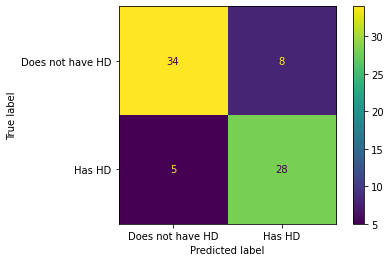

In [33]:
plot_confusion_matrix(clf_dt_pruned,X_test, Y_test, display_labels=["Does not have HD", "Has HD"])

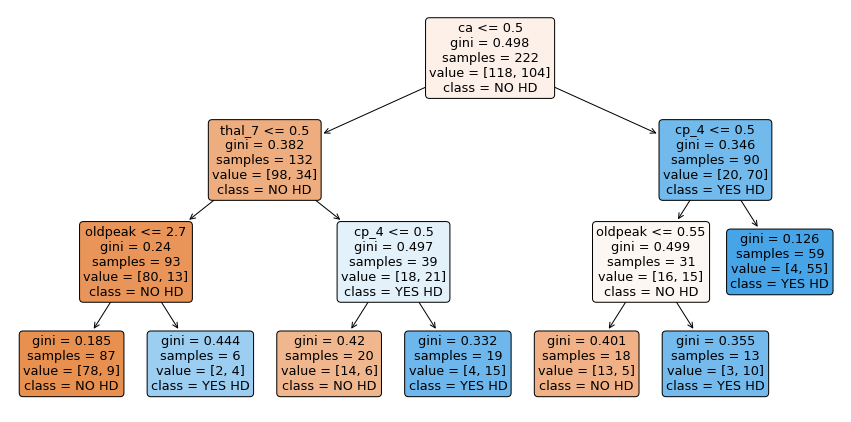

In [34]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,filled= True,rounded=True,class_names=["NO HD", "YES HD"],feature_names= x_encoded.columns);
plt.show()